<a href="https://colab.research.google.com/github/MaksymilianSzymczak/ML24/blob/main/Domowe_5.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




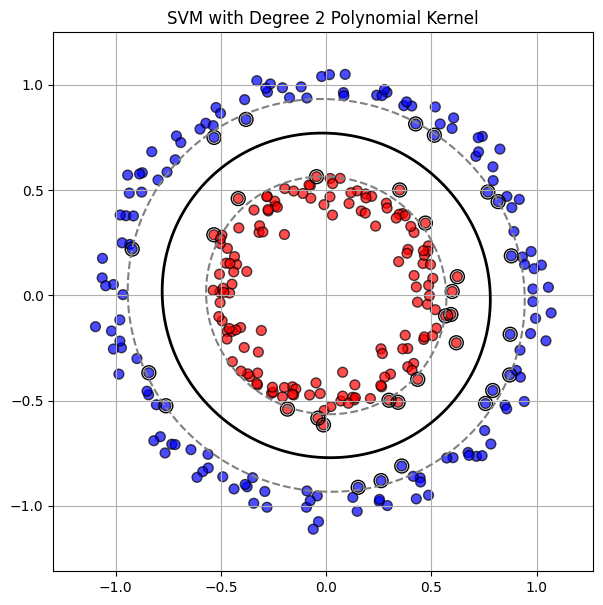

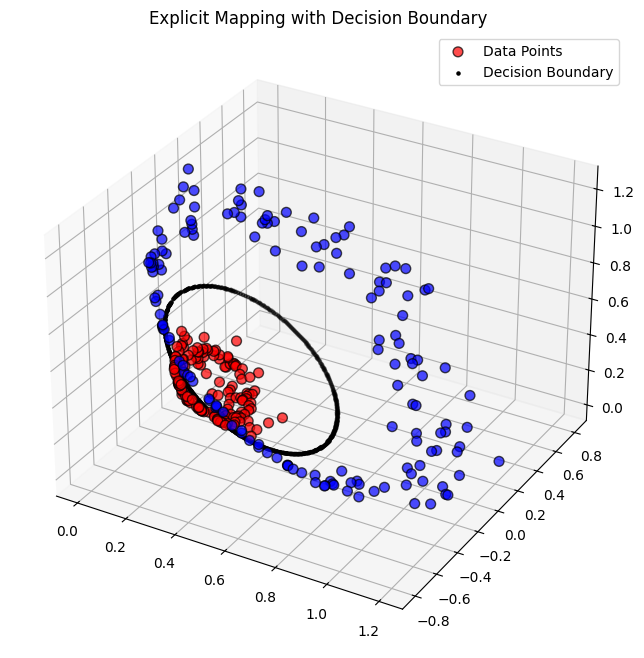

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

### Generating and visualizing dataset, SVM - exact stript from classes


# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()



# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping with Decision Boundary')


# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()




#Collaba przerosła trochę animacja (mnie czekanie, aż ją wypluje również), więc wstawiłęm po prostu jak wygląda wykres z różnych perspektyw, aby można to sobie było w miarędobrze wyobrazić.

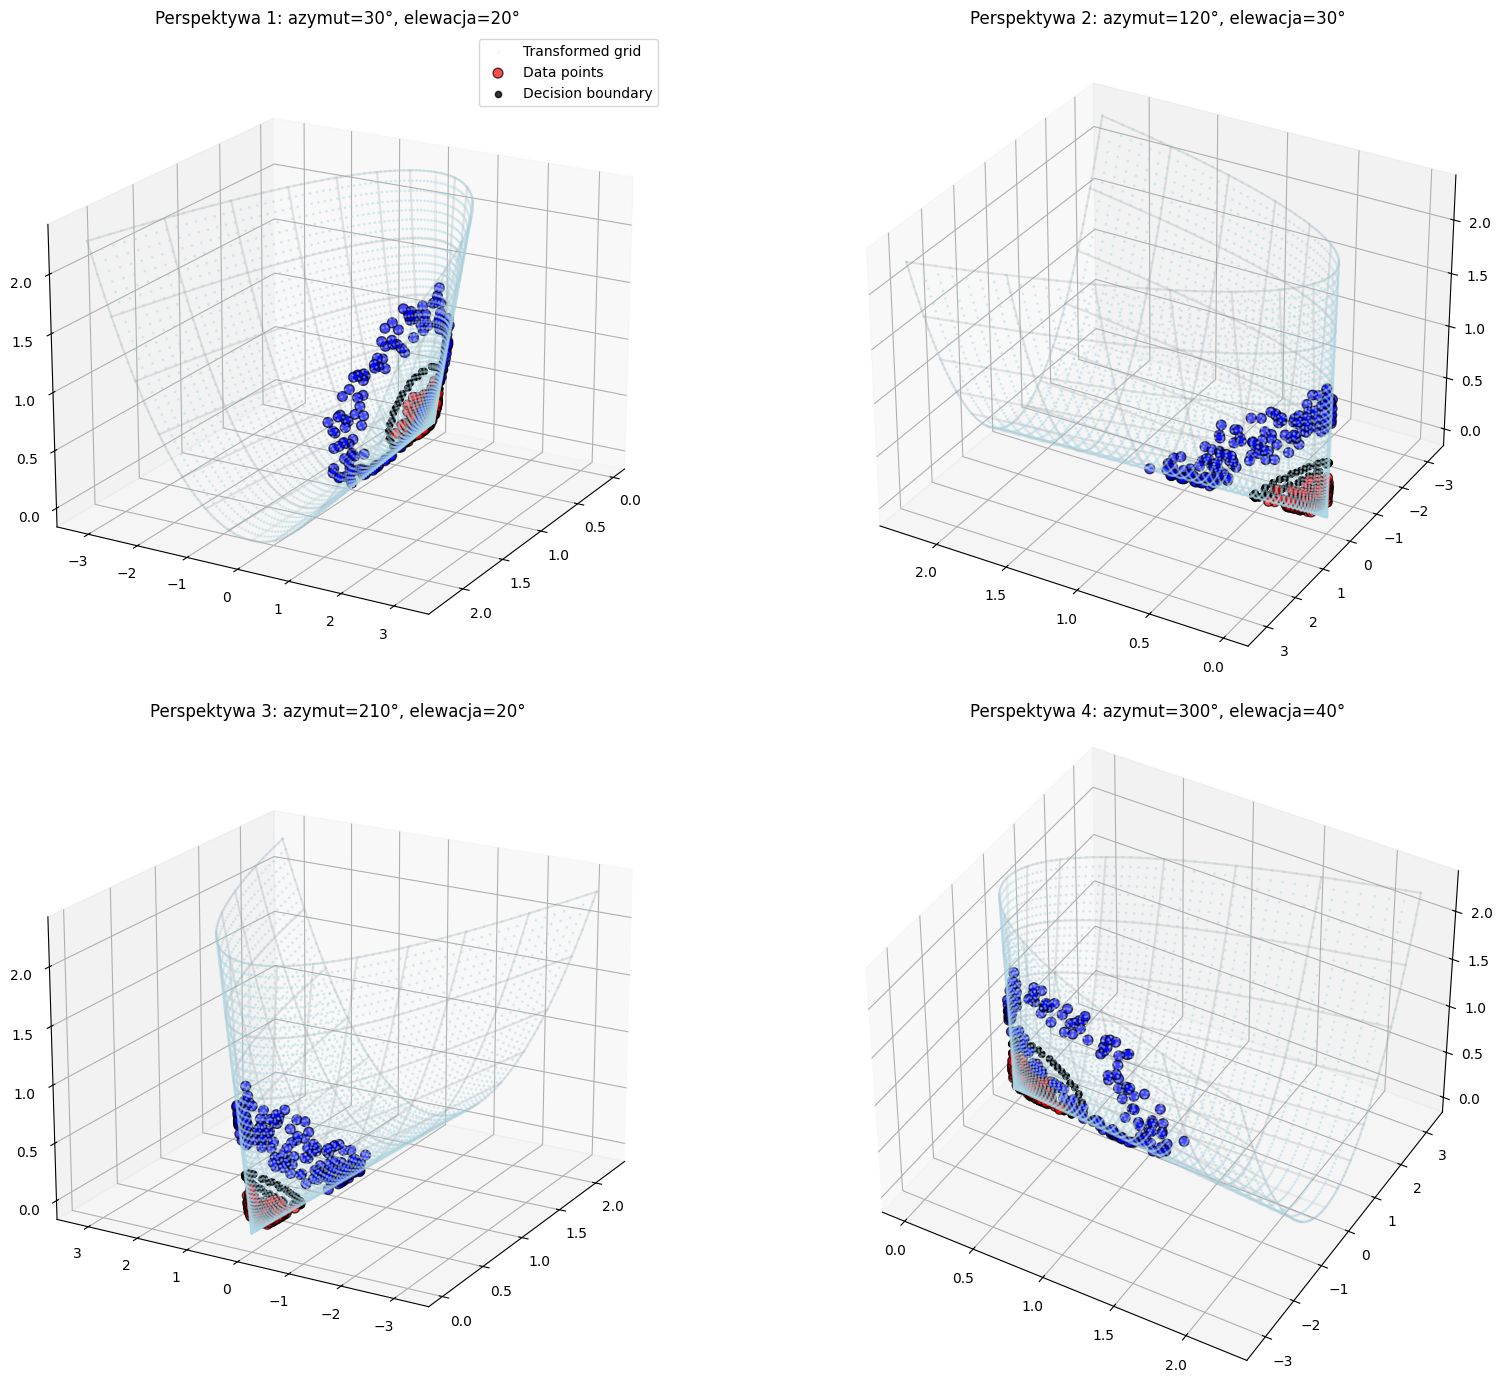

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

# Generowanie danych
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y_colors = np.where(y == 0, 'blue', 'red')

# Definiowanie przekształcenia phi
def phi(x):
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

# Przekształcenie punktów
phi_X = np.array([phi(x) for x in X])

# Generowanie siatki
grid = np.linspace(-1.5, 1.5, 100)
X1, X2 = np.meshgrid(grid, grid)
grid_points = np.vstack([X1.ravel(), X2.ravel()]).T
phi_grid = np.array([phi(x) for x in grid_points])

# Znalezienie punktów granicy decyzyjnej
boundary_points = []
for x in np.linspace(-1.5, 1.5, 100):
    for y in np.linspace(-1.5, 1.5, 100):
        if abs(x**2 + y**2 - 0.5) < 0.01:
            boundary_points.append(phi([x,y]))
boundary_points = np.array(boundary_points)

# Tworzenie 4 różnych widoków
fig = plt.figure(figsize=(18, 14))

# Definiowanie kątów widoku (azymut, elewacja)
views = [
    (30, 20),    # Widok 1
    (120, 30),   # Widok 2
    (210, 20),   # Widok 3
    (300, 40)    # Widok 4
]

for i, (azim, elev) in enumerate(views, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')

    # Rysowanie transformowanej siatki
    ax.scatter(phi_grid[:, 0], phi_grid[:, 1], phi_grid[:, 2],
              c='lightblue', alpha=0.2, s=1, label='Transformed grid')

    # Rysowanie linii siatki
    for val in np.linspace(-1.5, 1.5, 15):
        # Poziome linie
        line = np.array([[x, val] for x in np.linspace(-1.5, 1.5, 30)])
        phi_line = np.array([phi(p) for p in line])
        ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2], 'gray', alpha=0.1)

        # Pionowe linie
        line = np.array([[val, y] for y in np.linspace(-1.5, 1.5, 30)])
        phi_line = np.array([phi(p) for p in line])
        ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2], 'gray', alpha=0.1)

    # Rysowanie punktów danych
    ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2],
              c=y_colors, edgecolors='k', s=50, alpha=0.7, label='Data points')

    # Rysowanie granicy decyzyjnej
    ax.scatter(boundary_points[:, 0], boundary_points[:, 1], boundary_points[:, 2],
              c='black', s=20, alpha=0.8, zorder=10, label='Decision boundary')

    # Ustawianie perspektywy widoku
    ax.view_init(elev=elev, azim=azim)

    # Dodawanie tytułu i informacji o kącie
    ax.set_title(f'Perspektywa {i}: azymut={azim}°, elewacja={elev}°', fontsize=12)

    # Dodawanie etykiet osi (puste, jak w oryginalnym kodzie)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')

    # Dodawanie legendy tylko do pierwszego wykresu
    if i == 1:
        ax.legend(loc='upper right')

plt.tight_layout()
plt.show()



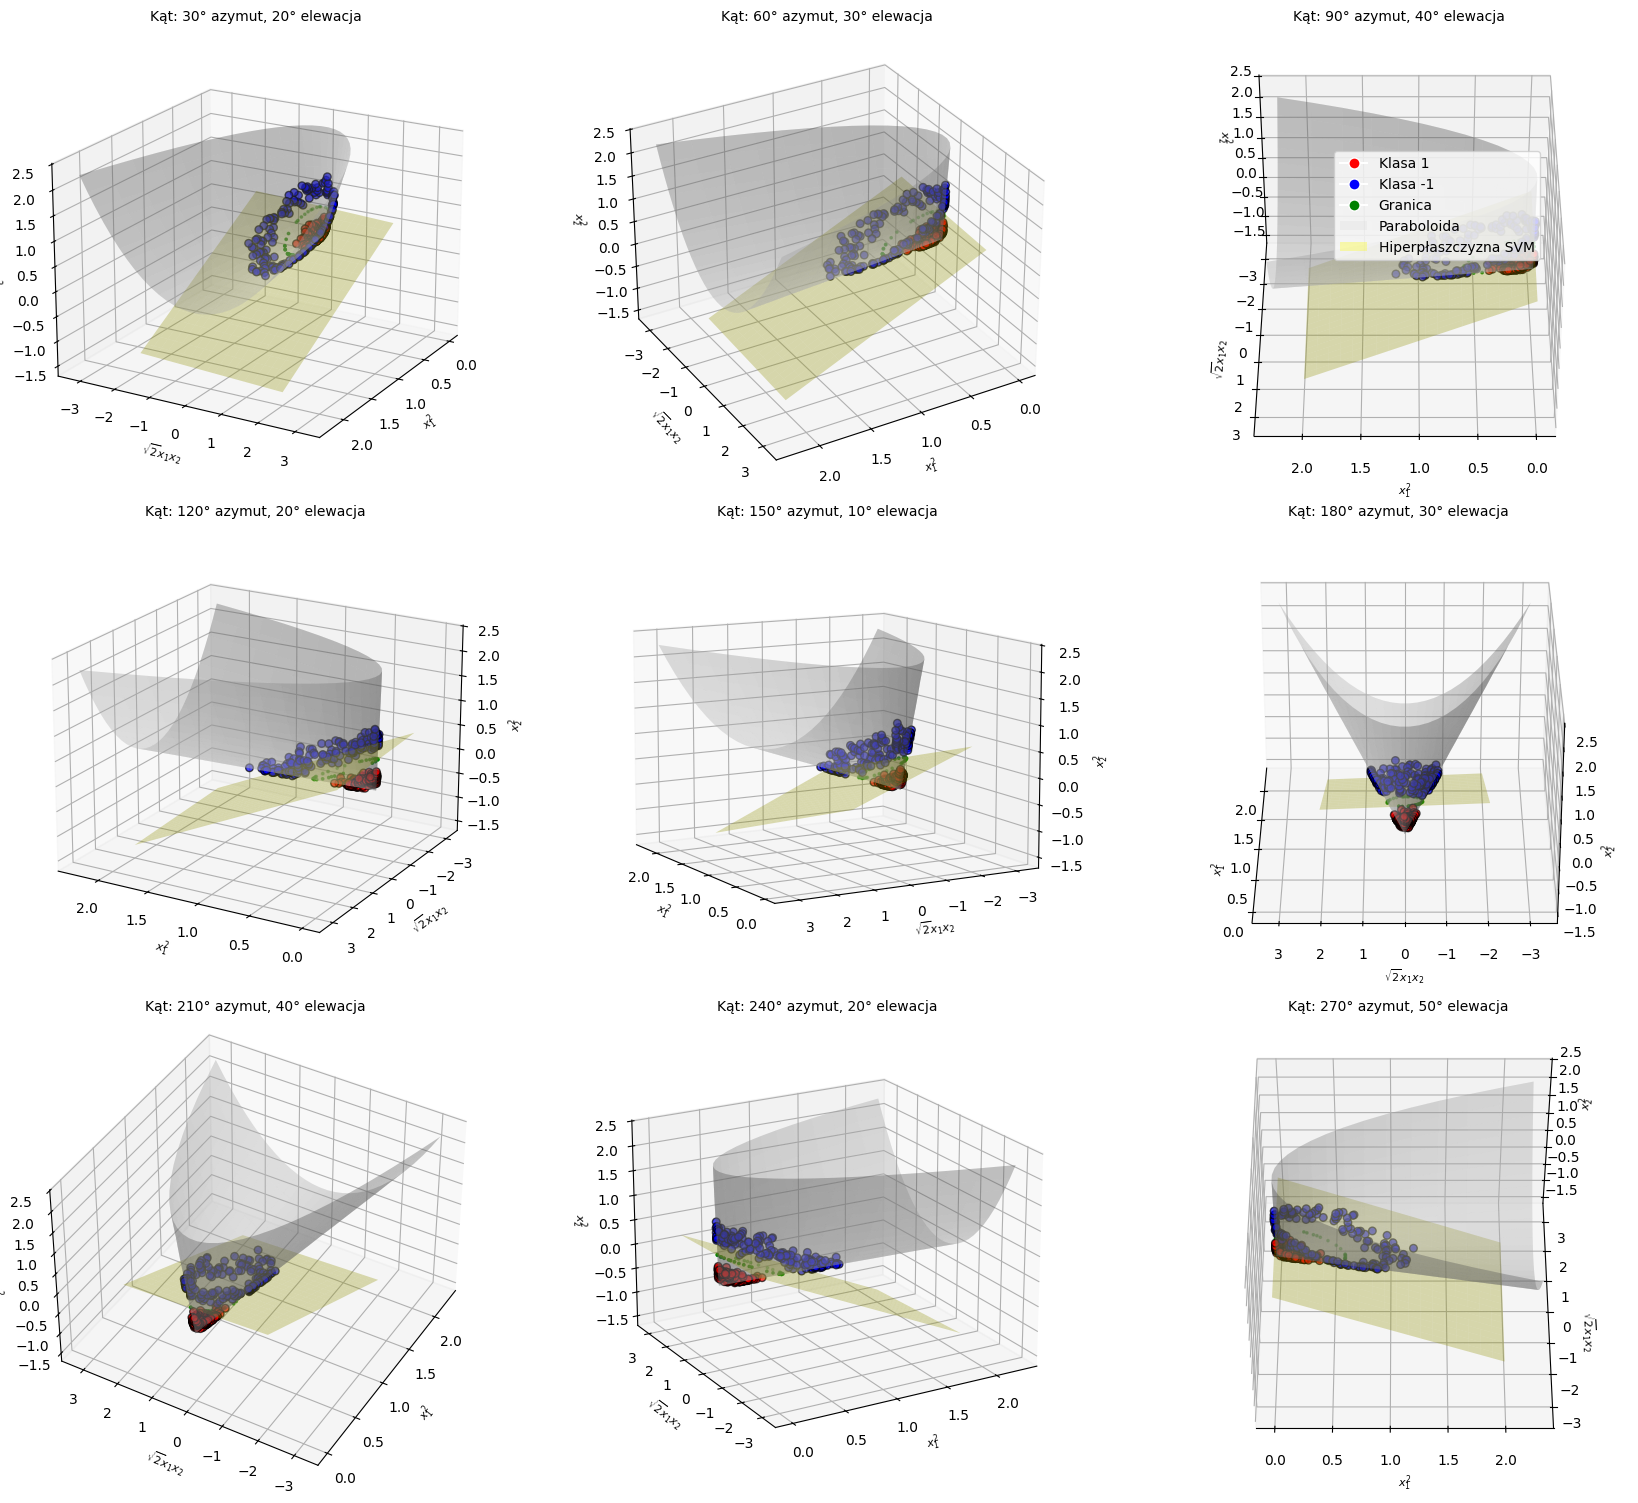

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# 1. Generowanie danych
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y_colors = np.where(y == 0, 'blue', 'red')

# 2. Trenowanie SVM z jądrem wielomianowym
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
clf.fit(X, np.where(y == 0, -1, 1))

# 3. Definiowanie przekształcenia phi
def phi(x):
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

# 4. Przekształcenie punktów danych
phi_X = np.array([phi(x) for x in X])

# 5. Obliczenie punktów granicy decyzyjnej
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
phi_grid = np.array([phi(x) for x in grid])
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)

# 6. Generowanie siatki dla wizualizacji paraboloidy
grid_range = np.linspace(-1.5, 1.5, 30)
X1, X2 = np.meshgrid(grid_range, grid_range)
grid_points = np.vstack([X1.ravel(), X2.ravel()]).T
phi_grid_full = np.array([phi(x) for x in grid_points])
X1_phi = phi_grid_full[:, 0].reshape(X1.shape)
X2_phi = phi_grid_full[:, 1].reshape(X1.shape)
X3_phi = phi_grid_full[:, 2].reshape(X1.shape)

# 7. Określenie hiperpłaszczyzny SVM
boundary_points = phi_grid[contour_mask]

if len(boundary_points) >= 3:
    # Użycie SVD do znalezienia najlepszego dopasowania płaszczyzny
    centroid = np.mean(boundary_points, axis=0)
    centered_points = boundary_points - centroid

    # SVD na przesunietych punktach
    u, s, vh = np.linalg.svd(centered_points)

    # Najmniejsza wartość osobliwa odpowiada kierunkowi z najmniejszą wariancją
    normal = vh[-1]

    # Wyraz wolny w równaniu płaszczyzny
    d = -np.dot(normal, centroid)

    # Siatka dla wizualizacji hiperpłaszczyzny
    xx_plane = np.linspace(0, 2, 20)
    yy_plane = np.linspace(-2, 2, 20)
    XX_plane, YY_plane = np.meshgrid(xx_plane, yy_plane)

    # Obliczenie wartości Z dla płaszczyzny
    if abs(normal[2]) > 1e-6:
        ZZ_plane = (-normal[0] * XX_plane - normal[1] * YY_plane - d) / normal[2]
    else:
        ZZ_plane = np.zeros_like(XX_plane)

    # 8. Wizualizacja z różnych kątów
    fig = plt.figure(figsize=(18, 15))

    # Definiowanie różnych kątów widoku
    view_angles = [
        (30, 20), (60, 30), (90, 40),
        (120, 20), (150, 10), (180, 30),
        (210, 40), (240, 20), (270, 50)
    ]

    for i, (azim, elev) in enumerate(view_angles):
        ax = fig.add_subplot(3, 3, i+1, projection='3d')

        # Rysowanie powierzchni paraboloidy
        ax.plot_surface(X1_phi, X2_phi, X3_phi,
                       color='lightgray', alpha=0.2,
                       rstride=1, cstride=1)

        # Rysowanie przekształconych punktów danych
        ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2],
                  c=y_colors, edgecolors='k', s=30, alpha=0.7)

        # Rysowanie granicy decyzyjnej
        ax.scatter(boundary_points[:, 0],
                  boundary_points[:, 1],
                  boundary_points[:, 2],
                  c='green', s=3)

        # Rysowanie hiperpłaszczyzny SVM
        ax.plot_surface(XX_plane, YY_plane, ZZ_plane,
                       color='yellow', alpha=0.3)

        # Konfiguracja
        ax.view_init(elev=elev, azim=azim)
        ax.set_title(f'Kąt: {azim}° azymut, {elev}° elewacja', fontsize=10)
        ax.set_xlabel('$x_1^2$', fontsize=8)
        ax.set_ylabel('$\\sqrt{2}x_1x_2$', fontsize=8)
        ax.set_zlabel('$x_2^2$', fontsize=8)

    # Legenda
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Klasa 1'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Klasa -1'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Granica'),
        Patch(facecolor='lightgray', alpha=0.2, label='Paraboloida'),
        Patch(facecolor='yellow', alpha=0.3, label='Hiperpłaszczyzna SVM')
    ]

    fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.9, 0.9))

    plt.tight_layout()
    plt.show()


#Primary Question
**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space not look like a “flat” hyperplane, even though we know the classifier’s separating surface is mathematically linear in that space?**

Granica decyzyjna SVM w przestrzeni cech 3D nie wygląda jak "płaska" hiperpłaszczyzna, bo to, co widzimy na wizualizacjach, to nie cała hiperpłaszczyzna, a jedynie jej przecięcie z paraboloidą. Parametryzacja $φ(x) = [x₁², √2x₁x₂, x₂²]$ przekształca wszystkie punkty z oryginalnej przestrzeni 2D na zakrzywioną powierzchnię paraboloidy w przestrzeni 3D. W efekcie, choć SVM (z "matematycznego" punktu widzenia) tworzy liniową granicę decyzyjną w przestrzeni 3D ("płaską' hiperpłaszczyznę), to w praktyce widzimy tylko miejsca, gdzie ta hiperpłaszczyzna przecina paraboloidę, a to przecięcie tworzy krzywą w postaci elipsy. Czyli po prostu nasze wzystkie dane ograniczają się do powierzchni paraboloidy, a jako, że granica decyzyjna też musi przebiegać przez tę powierzchnię, to skutkuje nadaniem jej pozornie nieliniowego wyglądu, mimo że w pełnej przestrzeni 3D jest ona nadal  liniowa.



#Secondary Question
**Explain why a hyperplane in 3D becomes a circular (or elliptical) curve when viewed back in the original 2D plane of the dataset.**

Jak napisałem wcześniej, f $φ(x) = [x₁², √2x₁x₂, x₂²]$ odwzorowuje dane 2D na paraboloidę w 3D. W tej przestrzeni SVM znajduje liniową hiperpłaszczyznę rozdzielającą klasy. Hiperpłaszczyzna w 3D przecina te przekształcone dane (paraboloidę), tworząc krzywą przecięcia - elipsę. Ta elipsa reprezentuje granicę decyzyjną w przestrzeni cech 3D. Gdy zastosujemy odwrotną transformację φ⁻¹ do punktów z tej elipsy, otrzymamy równanie kwadratowe w oryginalnej przestrzeni 2D: $$w₁x₁² + w₂√2x₁x₂ + w₃x₂² + b = 0$$ To równanie opisuje przekrój stożkowy, który separuje dane.
Hiperpłaszczyzna w 3D staje się okręgiem/elipsą w 2D, ponieważ transformacja φ(x) odwzorowuje dane na paraboloidę w 3D, gdzie SVM znajduje liniową separację. Przecięcie tej hiperpłaszczyzny z paraboloidą tworzy krzywą stożkową, a po odwzorowaniu do 2D równanie liniowe z 3D przekształca się w kwadratowe, opisujące kształt kołowy, który separuje oryginalne, nieliniowe dane.